# <center> **CO2 Emission by Vehicles Prediction**

In vehicles, the principal greenhouse gas is carbon dioxide (CO2) and we'll use Machine Learning to help us prevent environmental disasters. 

How can we prevent Global Warming? Obvious Answer: **With the help of Trees** 

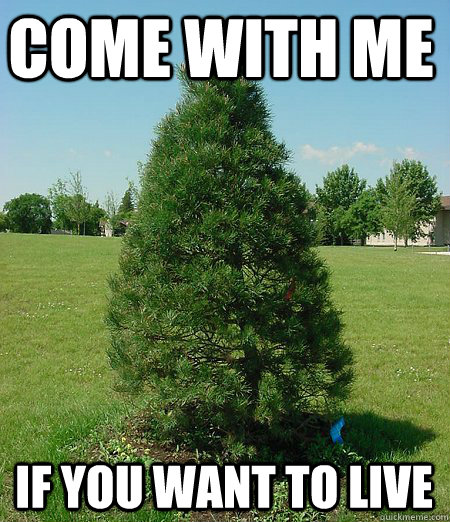

What I mean is we will use Regression Tree to predict the CO2 emissions quantity and also gain insights regarding how we can reduce CO2 emissions.

This ML model could be of use for the consumers that want to buy their next 
car. Since you insist on driving, how about picking one that has a lower environmental impact?

Download the Dataset from here: https://tinyurl.com/y8cyet85

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years.

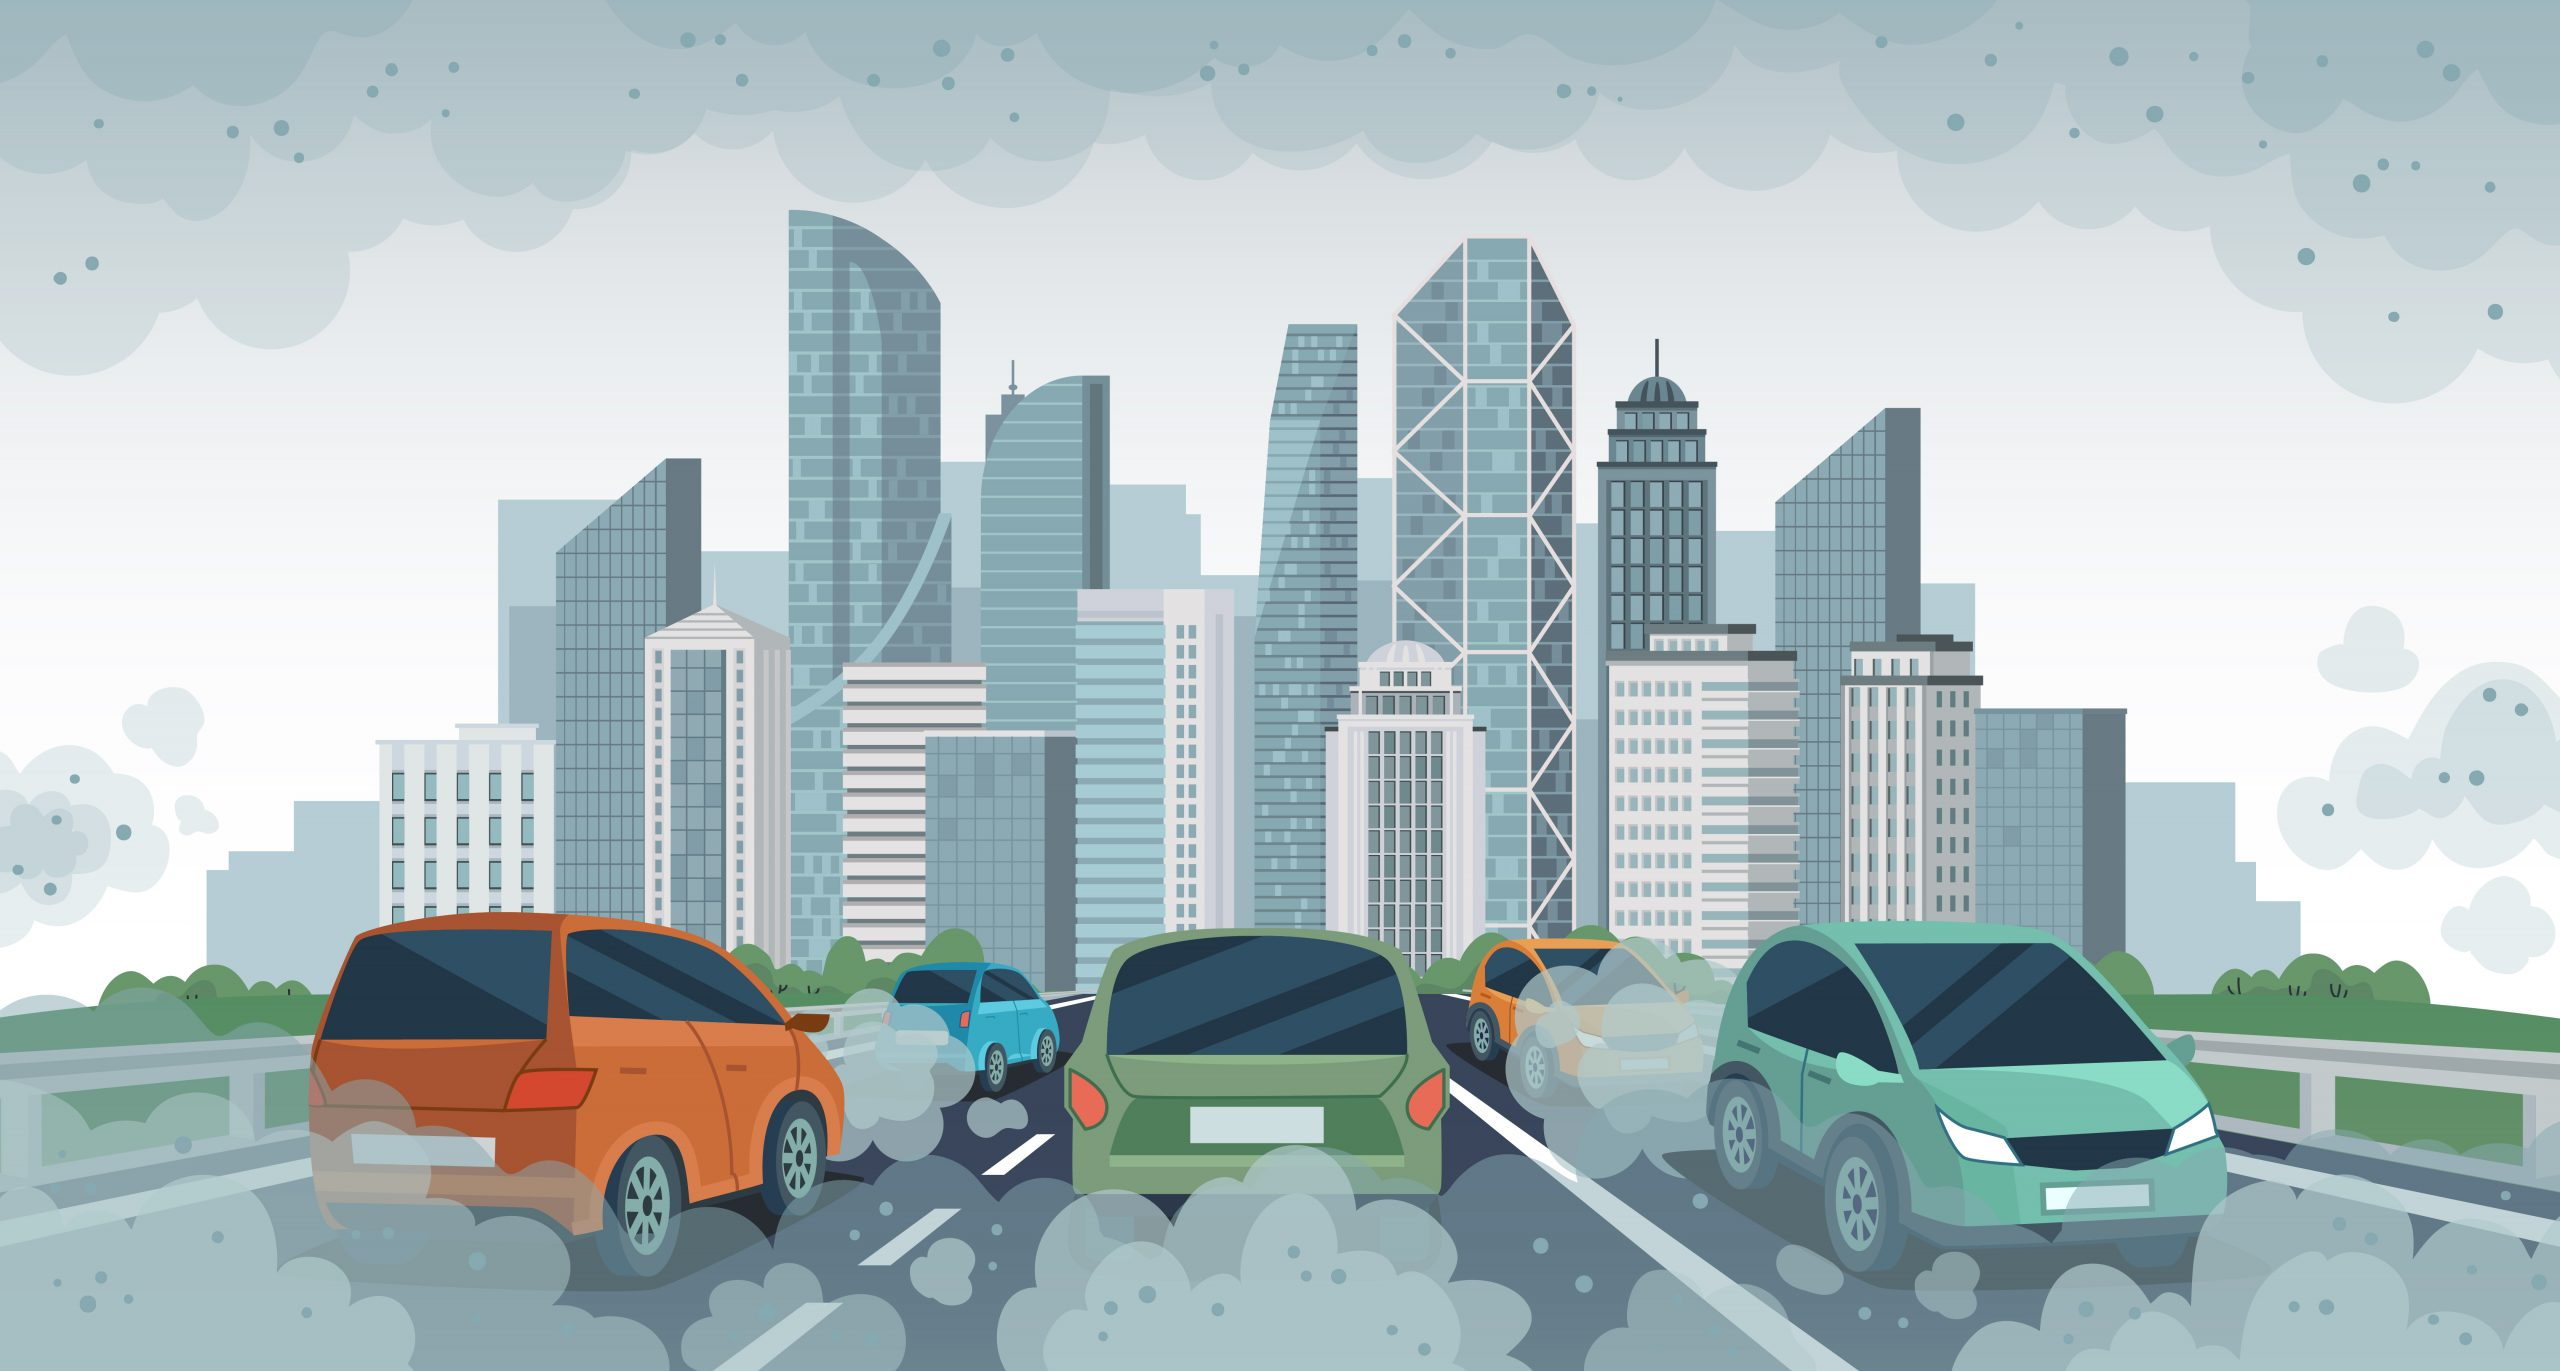

Importing the dataset

In [1]:
url = "https://tinyurl.com/y8cyet85"

Importing essential libraries for Machine Learning and Exploratory Data Analysis 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Variables

In [3]:
# importing dataset
df = pd.read_csv(url)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# print the columns(feature variables) of the dataset
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

'CO2 Emissions(g/km)' is our dependent variable which we are going to predict and others are independent variable.

## Missing Data

In [5]:
# To check the missing data
df.isnull()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,False,False,False,False,False,False,False,False,False,False,False,False
7381,False,False,False,False,False,False,False,False,False,False,False,False
7382,False,False,False,False,False,False,False,False,False,False,False,False
7383,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# to check total missing values each column
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

It shows that we don't have any missing values in any columns

## Data Types

In [7]:
# To check the data types of each column
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

## EDA - Univariate Analysis
If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.

In [8]:
# To check percentage count of each Fuel Type
df['Fuel Type'].value_counts(normalize=True)

X    0.492485
Z    0.433582
E    0.050102
D    0.023697
N    0.000135
Name: Fuel Type, dtype: float64

<AxesSubplot:ylabel='Transmission'>

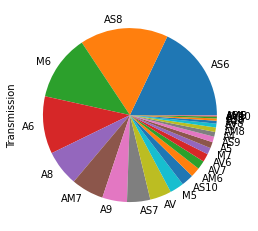

In [9]:
# To check percentage of each Transmission and plot a pie chart
df['Transmission'].value_counts(normalize=True).plot.pie()

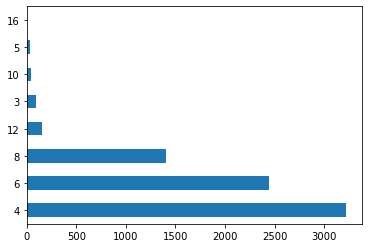

In [10]:
# plot the bar graph of count of cylinders
df['Cylinders'].value_counts().plot.barh()
plt.show()

In [11]:
# If the column or variable is of numerical then we’ll analyze by calculating 
# its mean, median, std, etc. Check with "Fuel Consumption City" column

df['Fuel Consumption City (L/100 km)'].describe()

count    7385.000000
mean       12.556534
std         3.500274
min         4.200000
25%        10.100000
50%        12.100000
75%        14.600000
max        30.600000
Name: Fuel Consumption City (L/100 km), dtype: float64

## EDA - Bivariate Analysis
If we analyze data by taking two variables into consideration from a dataset, it is known as Bivariate Analysis.

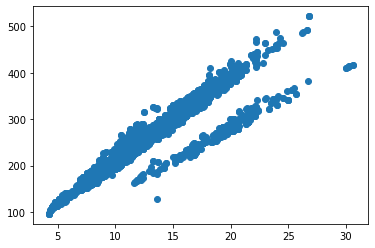

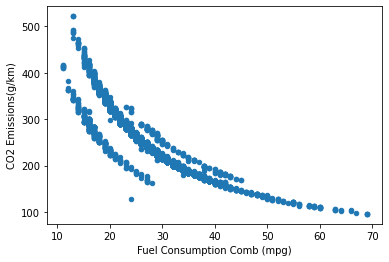

In [12]:
# plot the scatter plot of CO2 emission and Fuel Consumption Comb (L/100 km) variable in data

plt.scatter(df["Fuel Consumption City (L/100 km)"], df["CO2 Emissions(g/km)"])
plt.show()

# plot the scatter plot of CO2 emission and Fuel Consumption Comb (mpg) variable in data

df.plot.scatter(x='Fuel Consumption Comb (mpg)', y='CO2 Emissions(g/km)')
plt.show()

Graph 1 shows proportionality relation, while Graph 2 shows inverse proportional relation, meaning more Fuel Consumption Comb (mpg), lesser CO2 emission and more Fuel Consumption Comb (L/100 km), more CO2 emission. 

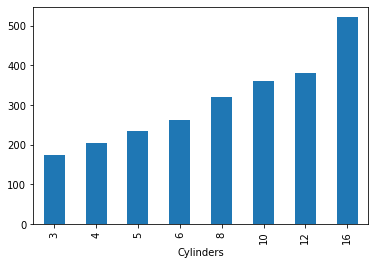

In [14]:
# plot the bar graph of Cylinders with average value of CO2 emission
df.groupby("Cylinders")["CO2 Emissions(g/km)"].mean().plot.bar()
plt.show()

It means that more number of cylinders in a vehicle, more is the CO2 emission.

## EDA - Multivariate Analysis
If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

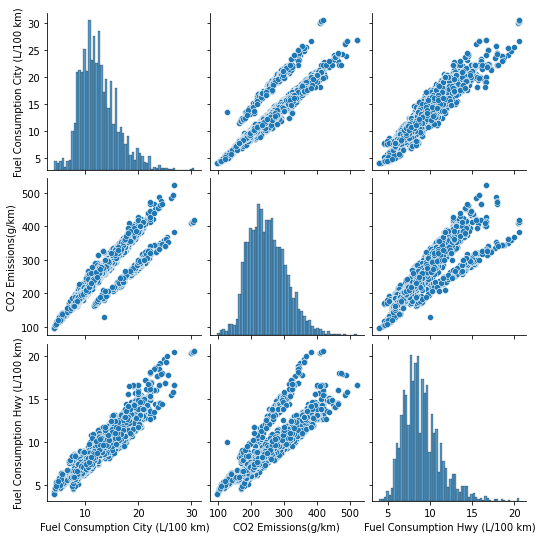

In [15]:
# plot the pair plot of Fuel Consumption City (L/100 km), 
# CO2 emission and Fuel Consumption Hwy (L/100 km)

sns.pairplot(data=df, vars = ['Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)', 'Fuel Consumption Hwy (L/100 km)'])
plt.show()

Fuel Type                         D          E     N          X          Z
Vehicle Class                                                             
COMPACT                    7.817391  12.731250   NaN   8.956920  12.239252
FULL-SIZE                  9.933333  17.812000   NaN  11.647872  14.869079
MID-SIZE                   8.792308  16.917391  15.2   9.392295  13.038683
MINICOMPACT                     NaN        NaN   NaN   8.597727  12.030851
MINIVAN                         NaN  19.281818   NaN  12.873913        NaN
PICKUP TRUCK - SMALL      11.875000        NaN   NaN  13.305926        NaN
PICKUP TRUCK - STANDARD   11.357143  19.988288   NaN  14.786188  15.923333
SPECIAL PURPOSE VEHICLE         NaN  15.418182   NaN  11.378947  11.533333
STATION WAGON - MID-SIZE        NaN        NaN   NaN   9.825000  13.113793
STATION WAGON - SMALL      7.800000        NaN   NaN   9.198895  10.764516
SUBCOMPACT                 7.600000        NaN   NaN  11.171942  12.598498
SUV - SMALL              

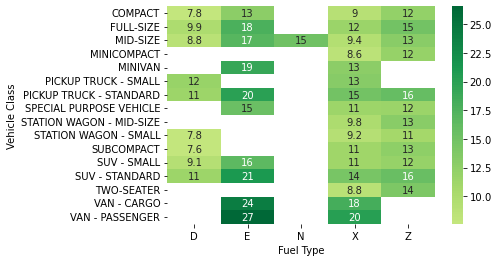

In [17]:
# create pivot table of Vehicle Class vs Fuel Type vs Fuel Consumption City (L/100 km)
result = pd.pivot_table(data=df, index='Vehicle Class',
                       columns='Fuel Type',
                       values='Fuel Consumption City (L/100 km)')
print(result)
print("========================================================")
print()

# create heat map for same now
sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

- As we know, more number of cylinders cause more CO2 emission(as it is proportional to Fuel Consumption City) but We had no idea of Fuel Type, but now we can see that, with Fuel Type, fuel E can cause more CO2 emission compared to other fuels.
- What we observed another thing is that Vans, SUV and Trucks causes more CO2 emission in general than any other vehicle due to their bigger size maybe. Observe every Van, SUV and Truck vehicle type and compare it with Others.

## Data Preprocessing

### Feature Processing
Look at the feature "Model", it has so many distinct values because there are so many different models and their variants as well, so it would be difficult to handle this many classes for our decision tree. What can we do is go back to Data and understand this column. https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles, remember this link shared on the top during Introduction to Problem statement.

In [18]:
# check value counts for "Model" column
df['Model'].value_counts()

F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV               24
SONIC                   20
                        ..
AVENTADOR S ROADSTER     1
HURACAN AWD              1
HURACAN SPYDER AWD       1
LS 500                   1
XC40 T4 AWD              1
Name: Model, Length: 2053, dtype: int64

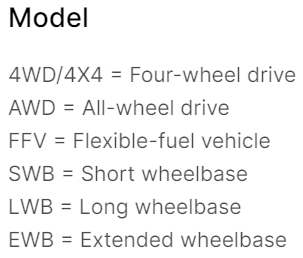

Remember reading this from Dataset? So, now what we have to do is preprocess these classes from entries of "Model" column. We'll need to split the string and find these names and use it as a feature. What we'll do is now, we will create a column for each class and make it 1 and 0.
For Exp: For a row having Model = HURACAN AWD, we will assign AWD column a 1 and all columns execpt AWD in that row will be assigned 0.

In [20]:
# create a checklist for the names we'll be looking for in Model column
Model_Type = ['4WD', '4X4', 'AWD', 'FFV', 'SWB', 'LWB', 'EWB']

# create a separate feature column for each model type and currently put 0 as values in them
df[Model_Type] = pd.DataFrame(np.zeros(shape=(len(df), len(Model_Type))))
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),4WD,4X4,AWD,FFV,SWB,LWB,EWB
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# For a model name in a row, if that name contains any particular model_type("AWD" or "4WD" etc)
# then we'll store 1 in the column corresponding to that model_type, ForExp: if Model is "F-150 FFV AWD", then df["FFV"] and df["AWD"] will be 1 for that row/Model 

for i in range(len(df)) :
    for j in df['Model'][i].split(" "): # Split the string and check on each term of splitted string
        if j in Model_Type :            # Check it is the model type name we are looking for
            df[j][i] = 1                # if it is, then we will give 1 to the column it corresponds to

# combine '4WD' and '4X4' - both are same as given in dataset
df['4WD'] = df['4X4'] + df['4WD']

# drop unnecessary columns now and print the tail of df
df.drop(['4X4', 'Model'], axis=1, inplace=True)
df.tail()

C:\Users\HP\AppData\Local\Temp\ipykernel_6504\256051045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = 1                # if it is, then we will give 1 to the column it corresponds to


,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),4WD,AWD,FFV,SWB,LWB,EWB
7380,VOLVO,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,0.0,1.0,0.0,0.0,0.0,0.0
7381,VOLVO,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,0.0,1.0,0.0,0.0,0.0,0.0
7382,VOLVO,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,0.0,1.0,0.0,0.0,0.0,0.0
7383,VOLVO,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,0.0,1.0,0.0,0.0,0.0,0.0
7384,VOLVO,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='AWD'>

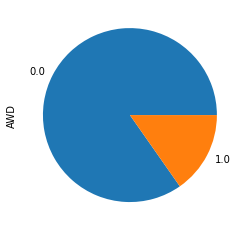

In [22]:
# Let's take an example now, check upon AWD column by plotting a pie chart to show how many are 1 and 0  
df["AWD"].value_counts(normalize=True).plot.pie()

## Encoding Categories
Encoding categorical variables is very important if not crucial this is because machine learning models are mathematical models that use algorithms that work with numerical data types. This is why, we need encoding methods to convert non-numerical data to meaningful numerical data. For this we look at Pandas get_dummies method.

In [23]:
# check encoding on Fuel Type column using pandas get_dummies method
pd.get_dummies(df['Fuel Type'])

,D,E,N,X,Z
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
7380,0,0,0,0,1
7381,0,0,0,0,1
7382,0,0,0,0,1
7383,0,0,0,0,1


In [24]:
# create dummies for categorical variables and print them
dummies = pd.get_dummies(df[['Fuel Type', 'Make', 'Transmission', 'Vehicle Class']])

print(dummies)
print("==========================================================================")
print()

# concat the created dummies with the original df and drop those categorical columns
encoded_df = pd.concat([df, dummies], axis=1)
encoded_df.drop(['Fuel Type', 'Make', 'Transmission', 'Vehicle Class'], 
                axis=1, inplace=True)
encoded_df.head()

      Fuel Type_D  Fuel Type_E  Fuel Type_N  Fuel Type_X  Fuel Type_Z  \
0               0            0            0            0            1   
1               0            0            0            0            1   
2               0            0            0            0            1   
3               0            0            0            0            1   
4               0            0            0            0            1   
...           ...          ...          ...          ...          ...   
7380            0            0            0            0            1   
7381            0            0            0            0            1   
7382            0            0            0            0            1   
7383            0            0            0            0            1   
7384            0            0            0            0            1   

      Make_ACURA  Make_ALFA ROMEO  Make_ASTON MARTIN  Make_AUDI  Make_BENTLEY  \
0              1                0         

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),4WD,AWD,FFV,...,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER
0,2.0,4,9.9,6.7,8.5,33,196,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,11.2,7.7,9.6,29,221,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,6.0,5.8,5.9,48,136,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,12.7,9.1,11.1,25,255,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,12.1,8.7,10.6,27,244,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
# Creating X and Y
y = encoded_df['CO2 Emissions(g/km)']
X = encoded_df.drop('CO2 Emissions(g/km)', axis=1)
print(y.head())
print("======================================================")
print()
print(X.head())

0    196
1    221
2    136
3    255
4    244
Name: CO2 Emissions(g/km), dtype: int64

   Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0             2.0          4                               9.9   
1             2.4          4                              11.2   
2             1.5          4                               6.0   
3             3.5          6                              12.7   
4             3.5          6                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  4WD  AWD  FFV  SWB  ...  \
0                        

**Creating Training and Testing datasets** \\
We will use sklearn library for this task. We will train_test_split method from sklearn's model_selection. 

test_size is the ratio in which we want to split. Generally, it's between 0.2 and 0.33. During using this method, the data is shuffled so random_state decides which state we want to keep so that everytime we run train_test_split, it doesn't randomly split the data and keeps it same.

In [26]:
# Splitting Data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=48)

# Decision Tree Regression - Baseline Model Fitting
A Baseline model is a model that is both simple to set up and has a reasonable chance of providing decent results

Initializing the Model

In [27]:
from sklearn.tree import DecisionTreeRegressor
Regression_Tree = DecisionTreeRegressor()

In [28]:
# Fitting the training data
Regression_Tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
# Generating Predictions
y_test_predictions = Regression_Tree.predict(X_test)
y_test_predictions

array([326., 198., 218., ..., 209., 306., 322.])

In [30]:
# baseline train score
Regression_Tree.score(X_train, y_train)

0.9997027551753866

In [31]:
# baseline test score
Regression_Tree.score(X_test, y_test)

0.9961057310073835

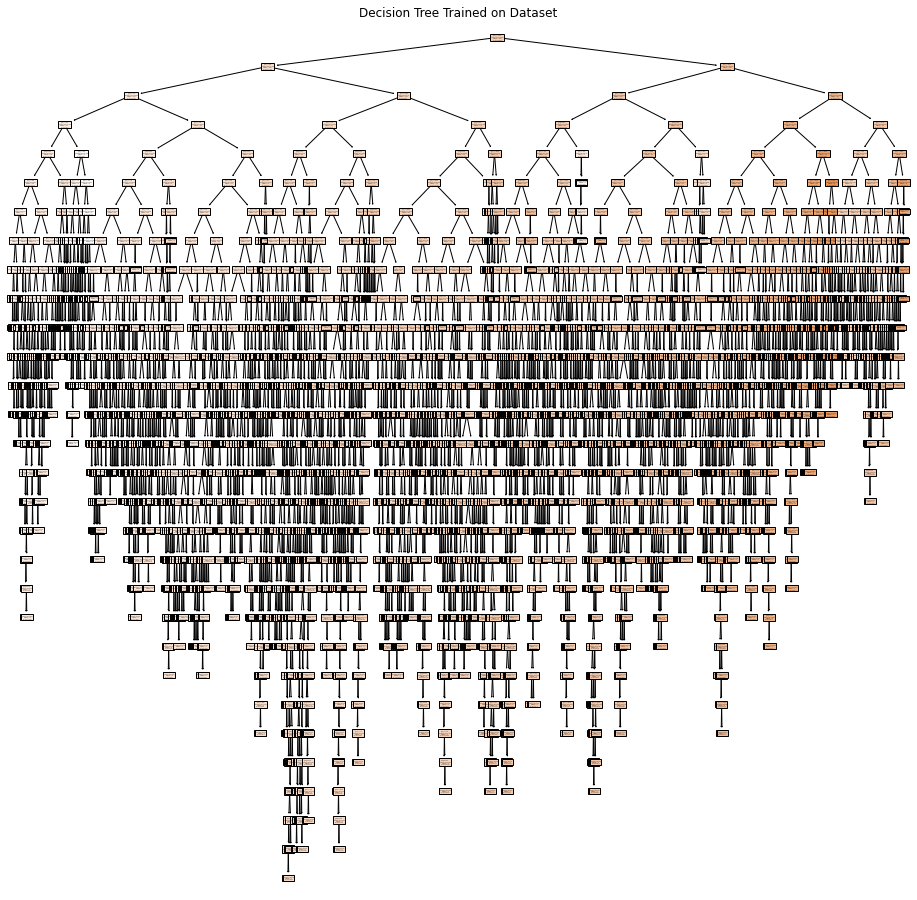

In [32]:
# use sklearn to plot tree
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(16, 16))
plot_tree(Regression_Tree, filled=True)
plt.title("Decision Tree Trained on Dataset")
plt.show()

## Introducing Hyperparameter Tuning - Hyperopt
Hyperparameters are different parameter values that decides the learning process and they significantly affect on the accuracy of machine learning models. 

Example of hyperparameters in the Decision Tree algorithm is the Minimum number of samples a node must possess before splitting(min_samples_split), maximum depth(max_depth), and criterion. These parameters are tunable and can directly affect how well model trains.

Then hyperparameter optimization is a process of finding the right combination of hyperparameter values in order to achieve maximum accuracy on the data in a reasonable amount of time. Therefore Hyperparameter optimization is considered the trickiest part of building machine learning models.

Most of these machine learning algorithms come with the default hyperparameters values. The default values do not always perform well on a different type of Machine Learning tasks you have, that's why you need to optimize them in order to get the right combination that will give you the best performance. 

**Hyperopt** is one of the advanced Hyperparameter optimization technique which uses a form of Bayesian optimization for parameter tuning that allows you to get the best parameters for a given model. It can optimize a model with hundreds of parameters on a large scale.

In [33]:
# import hyperopt 
import hyperopt
from hyperopt.pyll.base import scope

### Search Space
If we are solving a problem, we are usually looking for some solution which will be the best among others. The space of all feasible solutions (the set of solutions among which the desired solution resides) is called search space. Each point in the search space represents one possible solution. The hyperopt have different functions to specify ranges for input parameters, these are stochastic search spaces. 

The most common options for a search space to choose are :

- hp.choice(label, options) — This can be used for categorical parameters, it returns one of the options, which should be a list or tuple.Example: hp.choice("criterion", ["squared_error", "friedman_mse", "absolute_error", "poisson"])
- hp.uniform(label, low, high) — It returns a value uniformly between low and highExample: hp.uniform(“max_leaf_nodes”,1,10)
- hp.normal(label, mu, sigma) — This returns a real value that’s normally-distributed with mean mu and standard deviation sigma
- hp.qnormal(label, mu, sigma, q) — This returns a value like round(normal(mu, sigma) / q) * q
- hp. quniform(label, low, high, q) Returns a value like round(uniform(low, high) / q) * q. Suitable for a discrete value with respect to which the objective is still somewhat "smooth", but which should be bounded both above and below.


In [34]:
from hyperopt import tpe, hp, fmin, STATUS_OK, Trials

# Define Parameter Space for Optimization
space = {
    "max_depth" : hp.choice("max_depth", [i for i in range(1, 31)]),
    "criterion" : hp.choice("criterion", ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'])
}

In our case, we are looking for two parameters: criterion and max_depth. so we have following options for criterion, i.e “squared_error”, “friedman_mse”, “absolute_error”, “poisson”. And we will be looking at value of max_depth from 1 to 30. 

### KFold Validation
K-Folds cross-validator provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default). Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

Why KFold validation?

Because it ensures that every observation from the original dataset has the chance of appearing in training and test set. This is one among the best approach if we have a limited input data.

In [35]:
# import KFold from sklearn model selection and prepare a function for hyperparameter tuning for our hyperopt search space
from sklearn.model_selection import KFold

def hyperparameter_tuning(params) :
    clf = DecisionTreeRegressor(**params)
    k = 5
    kf = KFold(n_splits=k, random_state=None)
    acc_score = []
    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
        
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        
        clf.fit(X_train_kf, y_train_kf)
        acc = clf.score(X_test_kf, y_test_kf)
        acc_score.append(acc)
    
    avg_acc_score = sum(acc_score)/k

    return {"loss": -avg_acc_score, "status": STATUS_OK}  

fmin chooses the minimum of the losses that's why negative sign is used for finding maximum accuracy.

### Fit the Optimizer

In [36]:
# Initialize trials object
trails = Trials()

best = fmin(
    fn = hyperparameter_tuning,
    space = space,
    algo = tpe.suggest,
    max_evals = 100,
    trials = trails
)

print("Best : {}".format(best))

100%|█████████████████████████████████████████████| 100/100 [02:30<00:00,  1.50s/trial, best loss: -0.9968373792977563]
Best : {'criterion': 1, 'max_depth': 8}


In [37]:
# print the results for trials
trails.results

[{'loss': -0.9929654691874215, 'status': 'ok'},
 {'loss': -0.6040514896775676, 'status': 'ok'},
 {'loss': -0.9918339960036103, 'status': 'ok'},
 {'loss': -0.8826440056264326, 'status': 'ok'},
 {'loss': -0.9921596703625276, 'status': 'ok'},
 {'loss': -0.9964864973071045, 'status': 'ok'},
 {'loss': -0.9964983726346937, 'status': 'ok'},
 {'loss': -0.9964867219670237, 'status': 'ok'},
 {'loss': -0.9963772299622573, 'status': 'ok'},
 {'loss': -0.9928892732038648, 'status': 'ok'},
 {'loss': -0.9524576578991848, 'status': 'ok'},
 {'loss': -0.8826440056264326, 'status': 'ok'},
 {'loss': -0.1774565172370658, 'status': 'ok'},
 {'loss': -0.28318956332066036, 'status': 'ok'},
 {'loss': -0.996732942128502, 'status': 'ok'},
 {'loss': -0.9926722907124148, 'status': 'ok'},
 {'loss': -0.8826440056264326, 'status': 'ok'},
 {'loss': -0.9918263177854829, 'status': 'ok'},
 {'loss': -0.9827892248689419, 'status': 'ok'},
 {'loss': -0.9827892248689419, 'status': 'ok'},
 {'loss': -0.996715960345983, 'status': 

In [38]:
# print just losses for trials
trails.losses()

[-0.9929654691874215,
 -0.6040514896775676,
 -0.9918339960036103,
 -0.8826440056264326,
 -0.9921596703625276,
 -0.9964864973071045,
 -0.9964983726346937,
 -0.9964867219670237,
 -0.9963772299622573,
 -0.9928892732038648,
 -0.9524576578991848,
 -0.8826440056264326,
 -0.1774565172370658,
 -0.28318956332066036,
 -0.996732942128502,
 -0.9926722907124148,
 -0.8826440056264326,
 -0.9918263177854829,
 -0.9827892248689419,
 -0.9827892248689419,
 -0.996715960345983,
 -0.9968046944444293,
 -0.9968043883590305,
 -0.9965226800538988,
 -0.9965587630957096,
 -0.4371821126700429,
 -0.996192522795209,
 -0.9965205429665159,
 -0.9965208334203863,
 -0.9967095467247449,
 -0.19855028031237232,
 -0.993014746341555,
 -0.7998583054532279,
 -0.9964932785422057,
 -0.44089740286895135,
 -0.9926266097373236,
 -0.9964982690585584,
 -0.9965347031340575,
 -0.9917349037950632,
 -0.6040514896775676,
 -0.9967431115650568,
 -0.9964807167794895,
 -0.4031507970046245,
 -0.99653961783468,
 -0.9920874609568406,
 -0.996551173

In [39]:
# print just statuses for trials
trails.statuses()

['ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok']

## Comparing Baseline and Tuned Model

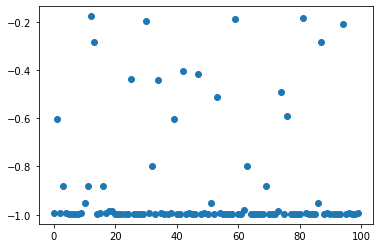

In [40]:
# plot to check accuracies given in the trials
plt.scatter([i for i in range(len(trails.losses()))], trails.losses())

### Training the tuned model
From above results we can say that "friedman_mse"(index 1 of criterion) and max_depth = 9(index 8 of our choice max_depth) gives the highest accuracy among all after applying KFold cross validation on our training dataset which is why our these features are best predictors for any new data, i.e test data.

In [41]:
# create new model with hyperparameters obtained from above
reg = DecisionTreeRegressor(criterion='friedman_mse', max_depth=9)
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=9)

### Analyzing train and test metrics

In [42]:
# check train score
reg.score(X_train, y_train)

0.99852569989073

In [43]:
# check test score
reg.score(X_test, y_test)

0.9968754308474841

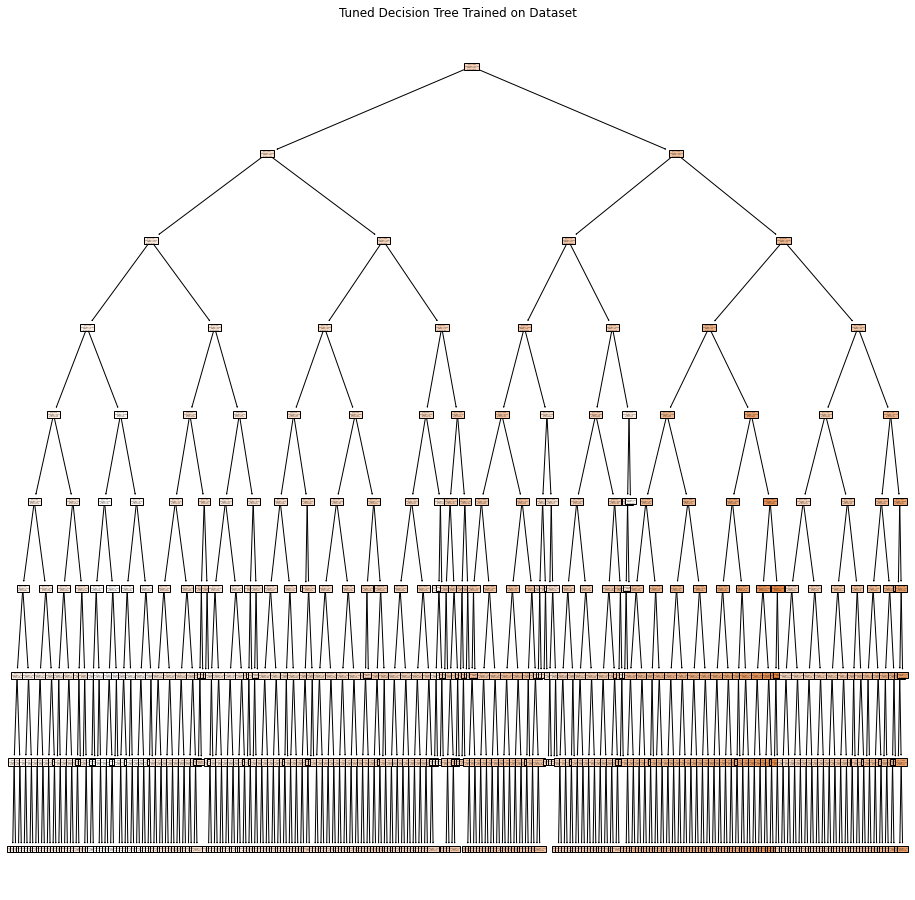

In [44]:
# plot the clf classifier tree
fig = plt.figure(figsize=(16, 16))

plot_tree(reg, filled=True)
plt.title("Tuned Decision Tree Trained on Dataset")
plt.show()

### Comparison
We used KFold validation method on our training dataset to choose the best parameters among the choice so that we can get better performance over our test data. Using the calculated best hyperparameters, we could successfully increase our test accuracy and avoided overfitting.